# This is a small CNN model to classify animals (Dogs, Cats and Chickens)


## Imports

In [1]:
import tensorflow as tf
import numpy as np
from matplotlib import pyplot as plt
import cv2
import imghdr
import os

/Users/ahmed/Library/Python/3.9/lib/python/site-packages/urllib3/__init__.py:35: NotOpenSSLWarning: urllib3 v2 only supports OpenSSL 1.1.1+, currently the 'ssl' module is compiled with 'LibreSSL 2.8.3'. See: https://github.com/urllib3/urllib3/issues/3020
  warnings.warn(


## Validate Images

In [2]:
data_dir = "data"
image_exts = ['jpg', 'jpeg', 'JPG', 'JPEG', 'bmp', 'png', 'PNG']
image_class_count = 0
for image_class in os.listdir(data_dir):
    if image_class.startswith('.'):
        continue
    image_class_count += 1
    for image in os.listdir(os.path.join(data_dir, image_class)):
        if image_class.startswith('.'):
            continue
        image_path = os.path.join(data_dir, image_class, image)
        try:
            img = cv2.imread(image_path)
            ext = imghdr.what(image_path)
            if ext not in image_exts:
                print('Image {} extension not supported {}', format(image_path), ext)
                os.remove(image_path)
        except Exception as e:
            print("Error loading {}", format(image_path))

Image {} extension not supported {} data/cat/black-cat-back.jpg None
Image {} extension not supported {} data/cat/pallas-cat-1-250-384.webp webp
Image {} extension not supported {} data/cat/two-different-breeds-of-cats-side-by-side-outdoors-in-the-garden.jpg None
Image {} extension not supported {} data/cat/Orange-colored-cat-yawns-displaying-teeth.jpg None
Image {} extension not supported {} data/cat/vector.svg None
Image {} extension not supported {} data/cat/vector9.svg None
Image {} extension not supported {} data/cat/vector8.svg None
Image {} extension not supported {} data/cat/800px-Juvenile_Ragdoll.jpg None
Image {} extension not supported {} data/cat/studio-portrait-sitting-tabby-cat-600nw-2269389471.jpg None
Image {} extension not supported {} data/cat/1200px-Cat_November_2010-1a.jpg None
Image {} extension not supported {} data/cat/vector3.svg None
Image {} extension not supported {} data/cat/Kitten.jpg.webp webp
Image {} extension not supported {} data/cat/vector2.svg None
I

libpng warning: iCCP: known incorrect sRGB profile


Image {} extension not supported {} data/dog/The_Wildest_Editorial_Adopting-Adult-Rescue-Dog_AdobeStock_303804010.jpg None


libpng warning: iCCP: known incorrect sRGB profile


Image {} extension not supported {} data/chicken/800px-Pollito.jpg None
Image {} extension not supported {} data/chicken/rooster-Rhode-Island-Red-roosters-chicken-domestication.jpg None
Image {} extension not supported {} data/chicken/.DS_Store None
Image {} extension not supported {} data/chicken/chicken2.jpg None
Image {} extension not supported {} data/chicken/clustering-chickens-henhouse-England-Devon-Members-flocks.jpg None
Image {} extension not supported {} data/chicken/img-730x400-community-content-vet-33-627239.jpg None
Image {} extension not supported {} data/chicken/Chicken.jpg None
Image {} extension not supported {} data/chicken/chicken-sunset-600nw-752120836.jpg None
Image {} extension not supported {} data/chicken/chickens-in-grass_0.jpg None
Image {} extension not supported {} data/chicken/1462061.webp webp
Image {} extension not supported {} data/chicken/colonel-by-erin-1.jpg None


libpng warning: iCCP: known incorrect sRGB profile


## Loading Data

In [3]:
data = tf.keras.utils.image_dataset_from_directory(data_dir)
data_itr = data.as_numpy_iterator()
batch = data_itr.next()

Found 781 files belonging to 3 classes.


2024-05-30 21:06:50.934017: I metal_plugin/src/device/metal_device.cc:1154] Metal device set to: Apple M1
2024-05-30 21:06:50.934044: I metal_plugin/src/device/metal_device.cc:296] systemMemory: 8.00 GB
2024-05-30 21:06:50.934049: I metal_plugin/src/device/metal_device.cc:313] maxCacheSize: 2.67 GB
2024-05-30 21:06:50.934072: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:305] Could not identify NUMA node of platform GPU ID 0, defaulting to 0. Your kernel may not have been built with NUMA support.
2024-05-30 21:06:50.934090: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:271] Created TensorFlow device (/job:localhost/replica:0/task:0/device:GPU:0 with 0 MB memory) -> physical PluggableDevice (device: 0, name: METAL, pci bus id: <undefined>)
2024-05-30 21:06:51.215918: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


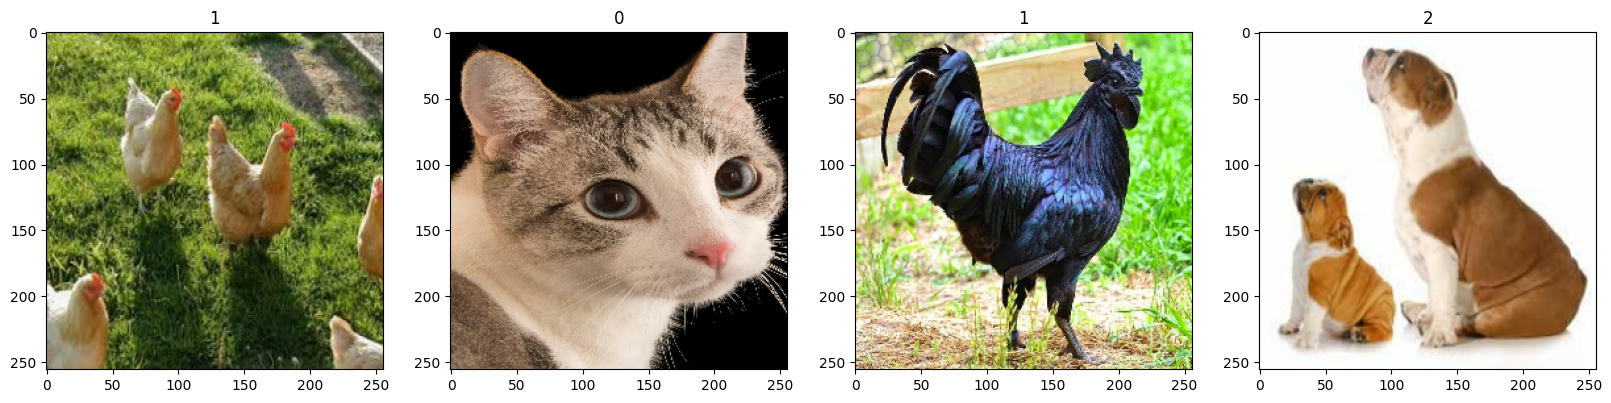

In [4]:
fig, ax = plt.subplots(ncols=4, figsize=(20,20))
for idx, img in enumerate(batch[0][:4]):
    ax[idx].imshow(img.astype(int))
    ax[idx].title.set_text(batch[1][idx])

In [5]:
# data = data.map(lambda x,y: (x/255, y))
# data_itr = data.as_numpy_iterator()
batch = data_itr.next()
batch[0][0].shape

(256, 256, 3)

# Splitting Data

In [10]:
data_len = len(data)
train_len = int(data_len * 0.7)
val_len = int(data_len * 0.2)
test_len = int(data_len * 0.1) + 1
if train_len + val_len + test_len - data_len != 0:
    print("Train: ", train_len, " Val: ", val_len, " Test: ", test_len, " Total: ", data_len, " Missing: ", train_len + val_len + test_len - data_len)
    print("Please check padding")

In [11]:
train_data = data.take(train_len)
val_data = data.skip(train_len).take(val_len)
test_data = data.skip(train_len+val_len).take(test_len)

In [12]:
train_data

<_TakeDataset element_spec=(TensorSpec(shape=(None, 256, 256, 3), dtype=tf.float32, name=None), TensorSpec(shape=(None,), dtype=tf.int32, name=None))>

## Building Model

In [43]:
model = tf.keras.Sequential([
    tf.keras.layers.Conv2D(16, (3, 3), activation="relu", input_shape=(256, 256, 3)),
    tf.keras.layers.MaxPooling2D(2, 2),
    tf.keras.layers.Conv2D(32, (3, 3), activation="relu"),
    tf.keras.layers.MaxPooling2D(2, 2),
    tf.keras.layers.Conv2D(16, (3, 3), activation="relu"),
    tf.keras.layers.MaxPooling2D(2, 2),

    tf.keras.layers.Flatten(),
    tf.keras.layers.Dropout(0.5),
    tf.keras.layers.Dense(256, activation="relu"),
    tf.keras.layers.Dense(image_class_count),
])

model.compile(optimizer="adam", loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True), metrics=["accuracy"])
model.summary()

Model: "sequential_5"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_15 (Conv2D)              │ (None, 254, 254, 16)   │           448 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_15 (MaxPooling2D) │ (None, 127, 127, 16)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_16 (Conv2D)              │ (None, 125, 125, 32)   │         4,640 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_16 (MaxPooling2D) │ (None, 62, 62, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_17 (Conv2D)              │ (None, 60, 60, 16)     │         4,624 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_17 (MaxPooling2D) │ (None, 30, 30, 16)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_5 (Flatten)             │ (None, 14400)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_2 (Dropout)             │ (None, 14400)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_10 (Dense)                │ (None, 256)            │     3,686,656 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_11 (Dense)                │ (None, 3)              │           771 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 3,697,139 (14.10 MB)

 Trainable params: 3,697,139 (14.10 MB)

 Non-trainable params: 0 (0.00 B)

## Training Model

In [44]:
logs_dir="logs"
tensorboard_callback = tf.keras.callbacks.TensorBoard(log_dir=logs_dir)

In [45]:
epochs = 20
hist = model.fit(train_data, validation_data=val_data, epochs=epochs, callbacks=[tensorboard_callback], verbose=0)
last_acc = hist.history["accuracy"][-1] * 100
print("Training Done, Accuracy: {0:.2f} %".format(last_acc))

2024-05-30 21:24:32.880785: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-05-30 21:24:34.020762: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-05-30 21:24:34.142952: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-05-30 21:24:35.208579: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-05-30 21:24:35.323857: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-05-30 21:24:35.581286: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-05-30 21:24:36.287517: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-05-30 21:24:36.435625: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-05-30 21:24:36.436910: W tensorflow/core/lib/png/png_io.cc:89] PNG 

Training Done, Accuracy: 98.35 %


## Plotting Accuracy

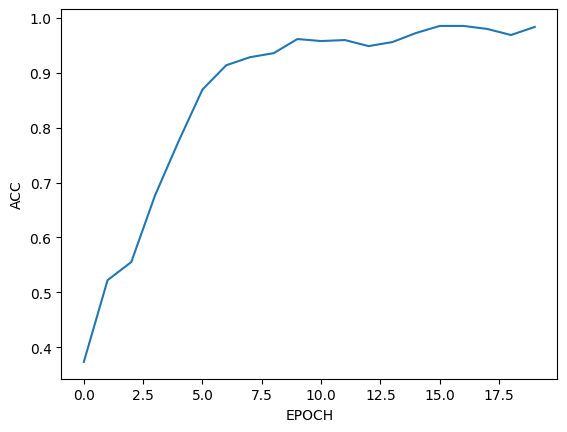

In [46]:
acc = hist.history
epoch_hist = hist.epoch

plt.figure()
plt.xlabel("EPOCH")
plt.ylabel("ACC")
plt.plot(acc["accuracy"])
plt.show()

## Evaluating

In [50]:
test_loss, test_acc = model.evaluate(test_data, verbose=0)
print("Test Accuracy: {0:.2f}%".format(test_acc * 100))

2024-05-30 21:32:16.900792: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-05-30 21:32:16.903606: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-05-30 21:32:17.150995: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


Test Accuracy: 96.10%


## Testing

### Prbability Model

In [82]:
probability_model = tf.keras.Sequential([
    model,
    tf.keras.layers.Softmax(),
])
probability_model.summary()

Model: "sequential_9"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ sequential_5 (Sequential)       │ ?                      │     3,697,139 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ softmax_3 (Softmax)             │ ?                      │             0 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 3,697,139 (14.10 MB)

 Trainable params: 3,697,139 (14.10 MB)

 Non-trainable params: 0 (0.00 B)

### Plot Function

### Getting Test Batch

In [83]:
test_batch = test_data.as_numpy_iterator().next()

2024-05-30 21:53:13.234825: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-05-30 21:53:13.277206: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-05-30 21:53:13.445770: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step


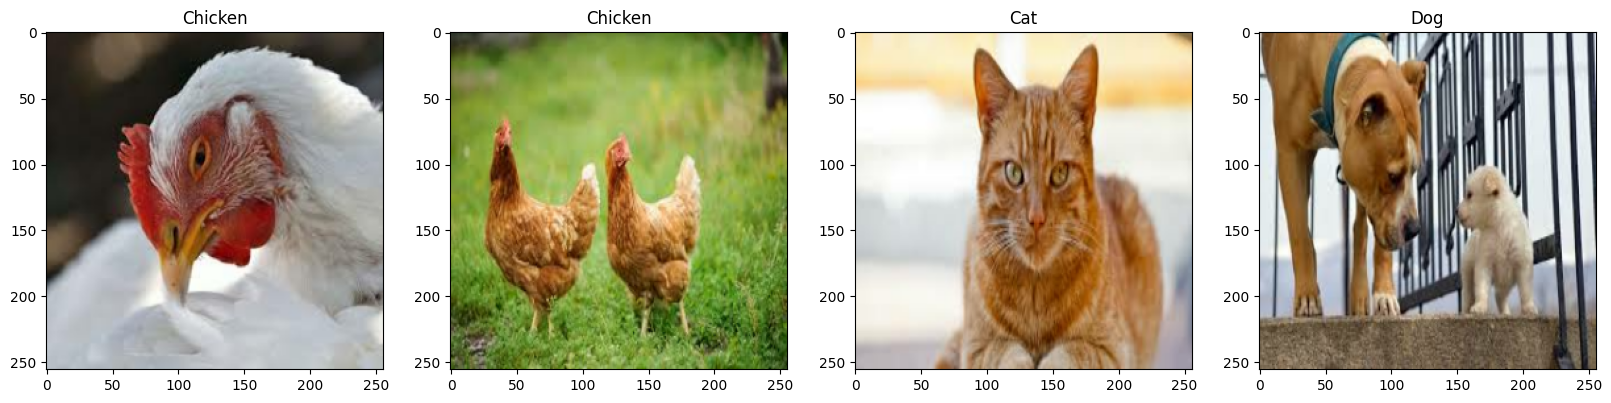

In [95]:
X, y = test_batch
yhats = probability_model.predict(X)
fig, adx = plt.subplots(ncols= 4, figsize=(20,20))
classes = ['Cat', 'Chicken', 'Dog']
for idx, yhat in enumerate(yhats):
    if idx > 3:
        continue
    img = X[idx]
    prediction = np.argmax(yhat)
    adx[idx].imshow(img.astype(int))
    adx[idx].title.set_text(classes[prediction])